In [26]:
import requests
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity as distance
import seaborn as sns
import numpy as np

In [ ]:
'''
users = requests.get('http://localhost:8080/idUser/user').json()

usernames=[]
for u in users:
    usernames.append(u[1])
    
usersid=[]
for u in users:
    usersid.append(u[0])

chatos=[]
for i in usersid:
     chatos.append(requests.get('http://localhost:8080/idUser/{}'.format(i)).json())

def getPhrase(chats):
    analiza = ' '.join([word for frase in chats for word in frase])
    return analiza

otherlist=[]
for e in chatos:
    otherlist.append(getPhrase(e))
'''

In [16]:
docs={}
for i,nombre in enumerate(usernames): 
    docs[nombre]= otherlist[i]

docs

{'Ellen Ripley': 'Dude!!! 😀️ Did you watch the game last night? Awesome! Boyander scored 3 goals! Way... For sure. We stayed at KuboLoco until 6AM. Dead, burried and still suffering! 🤮️ Sweety pie! How Ive longed to talk to you. Its Mike, honey bunny. Or doctor LOVE! And youre a sick little girl. Cant handle me on your own? That would be hot... 🔥️ I NEED VODKA LIKE A CAR NEEDS GAS',
 'Danny Torrances Finger': 'Im so angry right now! Impossible! Cant do it! Just cant! He pissed me off so much. But how am I suposed to fix the facial recognition system if it doesnt even work? And who the hell is Tony? 🤯️ Oh shit. I think youre friends with my brother. hola pepe',
 'Mike Wazowski': 'I saw you this morning. You shouldnt get so upset. ❤️ Dont get so frustrated, Leia. Remember what German said. Im sure you will find a way. I am Iron Man Uh-Oh. Better fix that quickly. Heyyyy, I love cats',
 'Leia Organa': 'Not again, Michael.... 😒️ Im gonna report you to Human Resources again, Michael. Id rat

In [17]:
docs.values()

dict_values(['Dude!!! 😀️ Did you watch the game last night? Awesome! Boyander scored 3 goals! Way... For sure. We stayed at KuboLoco until 6AM. Dead, burried and still suffering! 🤮️ Sweety pie! How Ive longed to talk to you. Its Mike, honey bunny. Or doctor LOVE! And youre a sick little girl. Cant handle me on your own? That would be hot... 🔥️ I NEED VODKA LIKE A CAR NEEDS GAS', 'Im so angry right now! Impossible! Cant do it! Just cant! He pissed me off so much. But how am I suposed to fix the facial recognition system if it doesnt even work? And who the hell is Tony? 🤯️ Oh shit. I think youre friends with my brother. hola pepe', 'I saw you this morning. You shouldnt get so upset. ❤️ Dont get so frustrated, Leia. Remember what German said. Im sure you will find a way. I am Iron Man Uh-Oh. Better fix that quickly. Heyyyy, I love cats', 'Not again, Michael.... 😒️ Im gonna report you to Human Resources again, Michael. Id rather have a fucking alien crawling out of my ass Ok, youve got to 

In [20]:
count_vectorizer = CountVectorizer()
sparse_matrix = count_vectorizer.fit_transform(docs.values())
sparse_matrix

<11x238 sparse matrix of type '<class 'numpy.int64'>'
	with 329 stored elements in Compressed Sparse Row format>

In [21]:
doc_term_matrix = sparse_matrix.todense()
df = pd.DataFrame(doc_term_matrix, 
                  columns=count_vectorizer.get_feature_names(), 
                  index=docs.keys())
display(df)

,6am,aa,about,again,alcoholics,alien,am,and,angry,anonymous,...,why,will,with,work,would,www,you,your,youre,youve
Ellen Ripley,1,0,0,0,0,0,0,2,0,0,...,0,0,0,0,1,0,2,1,1,0
Danny Torrances Finger,0,0,0,0,0,0,1,1,1,0,...,0,0,1,1,0,0,0,0,1,0
Mike Wazowski,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,3,0,0,0
Leia Organa,0,1,0,2,1,1,0,0,0,1,...,0,0,0,0,0,1,1,0,0,1
Danny Torrance,0,0,0,0,0,0,0,2,0,0,...,1,0,0,0,0,0,1,0,0,3
J. Jonah Jameson,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Tony Stark,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
John Wick,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
Guzman El Bueno,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,3,0,0,0
Tony Pons,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [23]:
similarity_matrix = distance(df, df)
print(similarity_matrix)

[[1.         0.1769596  0.17749926 0.12424948 0.20144406 0.06104677
  0.1835867  0.14686936 0.2207074  0.12038585 0.        ]
 [0.1769596  1.         0.15762208 0.0985138  0.14374723 0.06776309
  0.06113544 0.18340631 0.04454354 0.16703828 0.06681531]
 [0.17749926 0.15762208 1.         0.10869565 0.12335879 0.02492224
  0.15739281 0.15739281 0.29488391 0.14744196 0.07372098]
 [0.12424948 0.0985138  0.10869565 1.         0.24671758 0.04984448
  0.08993875 0.08993875 0.1228683  0.07372098 0.        ]
 [0.20144406 0.14374723 0.12335879 0.24671758 1.         0.0808122
  0.07290826 0.09113533 0.15936381 0.02988072 0.        ]
 [0.06104677 0.06776309 0.02492224 0.04984448 0.0808122  1.
  0.12888482 0.02577696 0.14085904 0.         0.        ]
 [0.1835867  0.06113544 0.15739281 0.08993875 0.07290826 0.12888482
  1.         0.13953488 0.177915   0.03812464 0.        ]
 [0.14686936 0.18340631 0.15739281 0.08993875 0.09113533 0.02577696
  0.13953488 1.         0.177915   0.19062321 0.        ]
 

,Ellen Ripley,Danny Torrances Finger,Mike Wazowski,Leia Organa,Danny Torrance,J. Jonah Jameson,Tony Stark,John Wick,Guzman El Bueno,Tony Pons,Miriam Perez
Ellen Ripley,1.000000,0.176960,0.177499,0.124249,0.201444,0.061047,0.183587,0.146869,0.220707,0.120386,0.000000
Danny Torrances Finger,0.176960,1.000000,0.157622,0.098514,0.143747,0.067763,0.061135,0.183406,0.044544,0.167038,0.066815
Mike Wazowski,0.177499,0.157622,1.000000,0.108696,0.123359,0.024922,0.157393,0.157393,0.294884,0.147442,0.073721
Leia Organa,0.124249,0.098514,0.108696,1.000000,0.246718,0.049844,0.089939,0.089939,0.122868,0.073721,0.000000
Danny Torrance,0.201444,0.143747,0.123359,0.246718,1.000000,0.080812,0.072908,0.091135,0.159364,0.029881,0.000000
J. Jonah Jameson,0.061047,0.067763,0.024922,0.049844,0.080812,1.000000,0.128885,0.025777,0.140859,0.000000,0.000000
Tony Stark,0.183587,0.061135,0.157393,0.089939,0.072908,0.128885,1.000000,0.139535,0.177915,0.038125,0.000000
John Wick,0.146869,0.183406,0.157393,0.089939,0.091135,0.025777,0.139535,1.000000,0.177915,0.190623,0.000000
Guzman El Bueno,0.220707,0.044544,0.294884,0.122868,0.159364,0.140859,0.177915,0.177915,1.000000,0.333333,0.000000
Tony Pons,0.120386,0.167038,0.147442,0.073721,0.029881,0.000000,0.038125,0.190623,0.333333,1.000000,0.000000


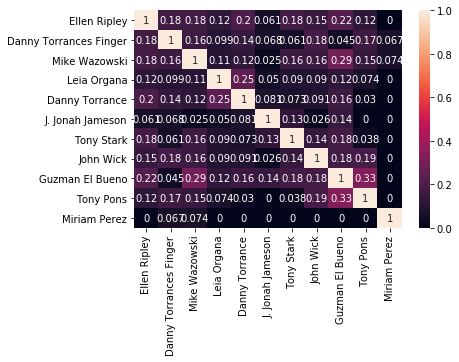

In [25]:
sim_df = pd.DataFrame(similarity_matrix, columns=docs.keys(), index=docs.keys())
display(sim_df)
sns.heatmap(sim_df,annot=True)

In [59]:
np.fill_diagonal(sim_df.values, 0) 
sim_df.idxmax()

Ellen Ripley              Guzman El Bueno
Danny Torrances Finger          John Wick
Mike Wazowski             Guzman El Bueno
Leia Organa                Danny Torrance
Danny Torrance                Leia Organa
J. Jonah Jameson          Guzman El Bueno
Tony Stark                   Ellen Ripley
John Wick                       Tony Pons
Guzman El Bueno                 Tony Pons
Tony Pons                 Guzman El Bueno
Miriam Perez                Mike Wazowski
dtype: object

In [39]:
pepe.loc['Tony Pons']

'Guzman El Bueno'

In [49]:
def makeDict():
    users = requests.get('http://localhost:8080/idUser/user').json()
    usernames=[]
    for u in users:
        usernames.append(u[1])
    usersid=[]
    for u in users:
        usersid.append(u[0])
    chatos=[]
    for i in usersid:
         chatos.append(requests.get('http://localhost:8080/idUser/{}'.format(i)).json())
    def getPhrase(chats):
        analiza = ' '.join([word for frase in chats for word in frase])
        return analiza
    otherlist=[]
    for e in chatos:
        otherlist.append(getPhrase(e))
    docs={}
    for i,nombre in enumerate(usernames): 
        docs[nombre]= otherlist[i]
    otrodict = docs
    return otrodict

In [50]:
makeDict()

{'Ellen Ripley': 'Dude!!! 😀️ Did you watch the game last night? Awesome! Boyander scored 3 goals! Way... For sure. We stayed at KuboLoco until 6AM. Dead, burried and still suffering! 🤮️ Sweety pie! How Ive longed to talk to you. Its Mike, honey bunny. Or doctor LOVE! And youre a sick little girl. Cant handle me on your own? That would be hot... 🔥️ I NEED VODKA LIKE A CAR NEEDS GAS',
 'Danny Torrances Finger': 'Im so angry right now! Impossible! Cant do it! Just cant! He pissed me off so much. But how am I suposed to fix the facial recognition system if it doesnt even work? And who the hell is Tony? 🤯️ Oh shit. I think youre friends with my brother. hola pepe',
 'Mike Wazowski': 'I saw you this morning. You shouldnt get so upset. ❤️ Dont get so frustrated, Leia. Remember what German said. Im sure you will find a way. I am Iron Man Uh-Oh. Better fix that quickly. Heyyyy, I love cats',
 'Leia Organa': 'Not again, Michael.... 😒️ Im gonna report you to Human Resources again, Michael. Id rat

In [60]:
def recommendator(name, dictionary):
    count_vectorizer = CountVectorizer(stop_words='english')
    sparse_matrix = count_vectorizer.fit_transform(dictionary.values())
    doc_term_matrix = sparse_matrix.todense()
    df = pd.DataFrame(doc_term_matrix, columns=count_vectorizer.get_feature_names(), index=dictionary.keys())
    similarity_matrix = distance(df, df)
    sim_df = pd.DataFrame(similarity_matrix, columns=dictionary.keys(), index=dictionary.keys())
    np.fill_diagonal(sim_df.values, 0) 
    pepe = sim_df.idxmax()
    dict45825121={}
    dict45825121[name]= 'Your best friend should be {}'.format(pepe.loc[name])
    return dict45825121
    

In [61]:
recommendator('Tony Pons', makeDict())

{'Tony Pons': 'Your best friend should be Guzman El Bueno'}